# 泰坦尼克号数据集调查

## 1 查看数据集结构

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_path = './titanic-data.csv'
original_df = pd.read_csv(file_path)
original_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### [Kaggle网站](https://www.kaggle.com/c/titanic/data)上的数据集结构说明：

**Data Dictionary**

|Variable|Definition|Key|
|:-|:-|:-|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||	
|Age|Age in years||	
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||	
|fare|Passenger fare||	
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
<br>1st = Upper
<br>2nd = Middle
<br>3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
<br>Sibling = brother, sister, stepbrother, stepsister
<br>Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
<br>Parent = mother, father
<br>Child = daughter, son, stepdaughter, stepson
<br>Some children travelled only with a nanny, therefore parch=0 for them.


In [166]:
# 数据行数
print len(original_df)

891


## 2 定义调查问题 
### 2.1 有哪些因素会让船上的人生还率更高？
* 舱位等级（Pclass）
* 年龄
* 性别
* 有亲属同船的
* 登船港口


## 3 数据加工（缺失数据处理）
### 3.1 查看各列缺失值数量

In [167]:
print '%16s    %s' % ('列名', '缺失值数量')
print '='*30
for col in original_df:
    print '%16s    %d' % (col,sum(original_df[col].isna()))


          列名    缺失值数量
     PassengerId    0
        Survived    0
          Pclass    0
            Name    0
             Sex    0
             Age    177
           SibSp    0
           Parch    0
          Ticket    0
            Fare    0
           Cabin    687
        Embarked    2


从初步调查看：
- 缺失值最多的是舱号（Cabin），由于调查问题中不涉及该列, 可不做处理
- 年龄（Age）缺失值较多, 而港口（Embarked）缺失值较少，可以查看缺港口的是否同时缺年龄

In [168]:
# 查看港口和年龄同时缺失的记录数
print sum(original_df['Embarked'].isna() & original_df['Age'].isna())

0


### 3.2 处理缺失数据

In [169]:
valid_age_df = original_df.loc[original_df['Age'].notna()]
valid_harbour_df = original_df.loc[original_df['Embarked'].notna()]
# 验证记录数
print len(valid_age_df)
print len(valid_harbour_df)

714
889


## 4 调查数据
### 4.1 描述数据

In [170]:
original_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### 4.2 调查问题1：有哪些因素会让船上的人生还率更高？
#### 4.2.1 舱位等级（Pclass）

In [171]:
figure_num = 0 #图号

def show_column_distribution(df, column, column_label, plottype='bar', tick_label=None):
    '''
    打印指定变量频数分布
    参数            类型                描述
    df              pandas.DataFrame    待分析数据
    column          string              指定自变量
    column_label    string              自变量标签
    plottype        string              图标类型：bar, hist
    tick_label      list                分组标签
    '''
    global figure_num
    if plottype == 'hist':
        plt.hist(df[column])
    elif plottype == 'bar':
        group_data = df.groupby(column)[column]
        group_count = group_data.count()
        print group_count
        plt.bar(group_count.index, group_count.values, tick_label=group_count.index if not tick_label else tick_label)
    plt.xlabel(column_label)
    plt.ylabel('Frequency')
    figure_num = figure_num + 1
    plt.title('Fig.{} {} Distribution'.format(figure_num, column_label))
    plt.show()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


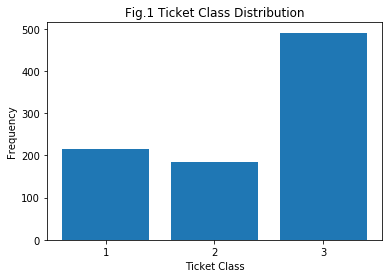

In [172]:
# 舱位人数分布
show_column_distribution(original_df,'Pclass','Ticket Class')

In [173]:
# 不同舱位等级乘员的生存率情况
original_df.groupby('Pclass')['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2       184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3       491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [174]:
def show_column_relation(df, column, column_label, 
                         plottype='bar',tick_label=None, key_column='Survived'):
    '''
    打印指定自变量与因变量关系的柱状图（离散变量）或直方图（连续变量）
    参数            类型                描述
    df              pandas.DataFrame    待分析数据
    column          string              指定自变量
    column_label    string              自变量标签
    plottype        string              图标类型：bar, hist
    tick_label      list                分组标签
    key_column      string              因变量
    '''
    global figure_num
    group_data = df.groupby(column)[key_column]
    mean_data = group_data.mean()
    if plottype == 'bar':
        plt.bar(mean_data.index, mean_data.values*100, tick_label=mean_data.index if not tick_label else tick_label)
    elif plottype == 'hist':
        plt.hist(mean_data)
    plt.xlabel(column_label)
    plt.ylabel('Survival(%)')
    figure_num = figure_num + 1
    plt.title('Fig.{} {} - Survival Relation'.format(figure_num, column_label))
    plt.show()
        

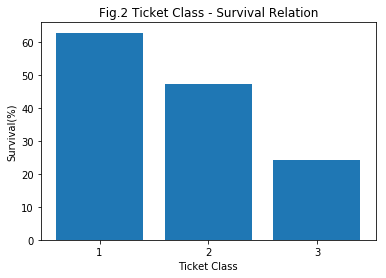

In [175]:
# 不同舱位等级生存率比较
show_column_relation(original_df, 'Pclass', 'Ticket Class')

In [176]:
print figure_num

2


In [177]:
from scipy.stats import chisquare

HEADER_MSG = u'''
观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=%.2f，卡方检验，分组变量 %s
''' + '='*30
    
def show_chisquare_test(df, column, alpha=0.05, key_column='Survived'):
    '''
    打印按指定变量分组的实际生存数与
    预期生存数卡方检验结果
    参数        类型                描述
    df          pandas.DataFrame    待分析数据
    column      string              指定自变量
    alpha       float               检验水平
    key_column  string              因变量
    '''
    
    print HEADER_MSG % (alpha, column)
    
    group_data = df.groupby(column)[key_column] 
    group_sum = group_data.sum()
    group_count = group_data.count()
    temp_df = pd.DataFrame({u'实际生存数':group_sum,
                             u'预期生存数':group_count * df[key_column].mean()},
                             index=list(group_data.groups.keys()))
    print temp_df.T
    print '='*30
    print '检验结果\n', chisquare(temp_df.iloc[:, 0],temp_df.iloc[:, 1])  

In [178]:
# Pclass为离散变量，用卡方检验
show_chisquare_test(original_df,'Pclass')


观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验，分组变量 Pclass
                1          2           3
实际生存数  136.000000  87.000000  119.000000
预期生存数   82.909091  70.626263  188.464646
检验结果
Power_divergenceResult(statistic=63.396245597723173, pvalue=1.7126955990497913e-14)


**结论4.2.1**
- 根据图1所示，舱位等级越高的乘员生存率越高。
- 因为$ P = 1.713*10^{-14} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即不同舱位等级乘员的生存人数与预期（按总体生存率计算）生存人数不相符，也就是舱位等级与乘员的生存率有关。

#### 4.2.2 性别（Sex）

Sex
female    314
male      577
Name: Sex, dtype: int64


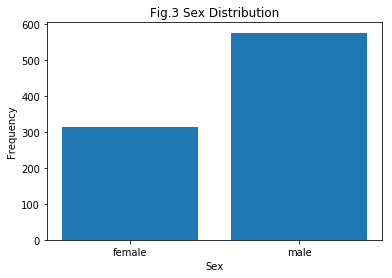

In [179]:
# 不同性别人数分布
show_column_distribution(original_df,'Sex','Sex')

In [180]:
# 不同性别乘员的生存率情况
original_df.groupby('Sex')['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male    577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

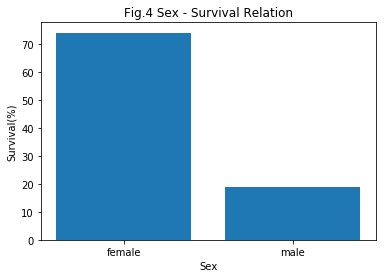

In [181]:
#不同性别生存率
show_column_relation(original_df, 'Sex','Sex')

In [182]:
# Sex为离散变量，用卡方检验 
show_chisquare_test(original_df,'Sex')


观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验，分组变量 Sex
             male      female
实际生存数  109.000000  233.000000
预期生存数  221.474747  120.525253
检验结果
Power_divergenceResult(statistic=162.08166685161615, pvalue=3.970516389658672e-37)


**结论4.2.2**
- 因为$ P = 3.971*10^{-37} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即不同性别乘员的生存人数与预期（按总体生存率计算）生存人数不相符，也就是性别与乘员的生存率有关。
- 女性生存率较男性高。

#### 4.2.3 有亲属同船的（SibSp, Parch）

Relatives
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Relatives, dtype: int64


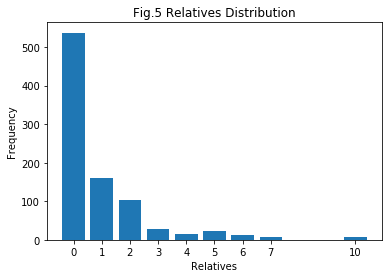

In [183]:
# 合并同船亲属：
original_df['Relatives'] = original_df['SibSp'] + original_df['Parch']
# 亲属数量分布
show_column_distribution(original_df, 'Relatives', 'Relatives')

In [184]:
# original_df[original_df['Relatives']>5]
original_df.groupby('Relatives')['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Relatives                                                    
0          537.0  0.303538  0.460214  0.0  0.0  0.0  1.0  1.0
1          161.0  0.552795  0.498756  0.0  0.0  1.0  1.0  1.0
2          102.0  0.578431  0.496249  0.0  0.0  1.0  1.0  1.0
3           29.0  0.724138  0.454859  0.0  0.0  1.0  1.0  1.0
4           15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0
5           22.0  0.136364  0.351250  0.0  0.0  0.0  0.0  1.0
6           12.0  0.333333  0.492366  0.0  0.0  0.0  1.0  1.0
7            6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
10           7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

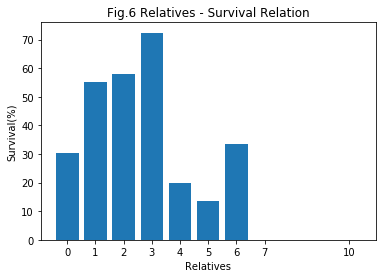

In [185]:
# 亲属同船生存率比较
show_column_relation(original_df, 'Relatives', 'Relatives')

In [186]:
# Relatives为离散变量，用卡方检验 
show_chisquare_test(original_df,'Relatives')


观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验，分组变量 Relatives
               0         1          2          3         4         5   \
实际生存数  163.000000  89.00000  59.000000  21.000000  3.000000  3.000000   
预期生存数  206.121212  61.79798  39.151515  11.131313  5.757576  8.444444   

             6        7         10  
实际生存数  4.000000  0.00000  0.000000  
预期生存数  4.606061  2.30303  2.686869  
检验结果
Power_divergenceResult(statistic=49.707183027350283, pvalue=4.6518816331336911e-08)


**结论4.2.3**
- 从图6看，有1-3名亲属同船者生存率较高。
- 因为$ P = 4.652*10^{-8} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即有不同数量亲属同船的乘员的生存人数与预期（按总体生存率计算）生存人数不相符，也就是同船亲属数量与乘员的生存率有关。

#### 4.2.4 登船港口（Embarked）

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


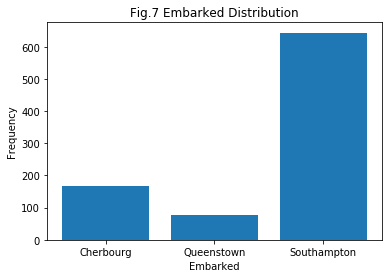

In [187]:
# 登船港口人数分布
show_column_distribution(valid_harbour_df, 'Embarked', 'Embarked',tick_label=['Cherbourg', 'Queenstown', 'Southampton'])

In [188]:
# 不同港口登船乘员的生存率情况
valid_harbour_df.groupby('Embarked')['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Embarked                                                    
C         168.0  0.553571  0.498608  0.0  0.0  1.0  1.0  1.0
Q          77.0  0.389610  0.490860  0.0  0.0  0.0  1.0  1.0
S         644.0  0.336957  0.473037  0.0  0.0  0.0  1.0  1.0

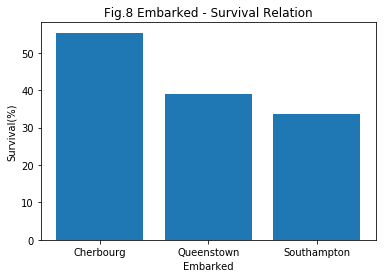

In [189]:
# 不同港口登船者生存率比较
show_column_relation(valid_harbour_df, 'Embarked', 'Embarked',tick_label=['Cherbourg', 'Queenstown', 'Southampton'])

In [190]:
# Embarked为离散变量，用卡方检验
show_chisquare_test(original_df,'Embarked')


观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验，分组变量 Embarked
               Q          C           S
实际生存数  30.000000  93.000000  217.000000
预期生存数  29.555556  64.484848  247.191919
检验结果
Power_divergenceResult(statistic=16.303690509211101, pvalue=0.00028820306064068123)


**结论4.2.4**
- 图8显示从Cherbourg登船的人生存率较高。
- 因为$ P = 2.804*10^{-4} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即不同港口登船的生存人数与预期（按总体生存率计算）生存人数不相符，也就是登船港口与乘员的生存率有关。

#### 4.2.5 年龄（Age）

In [191]:
# 查看年龄分布情况
valid_age_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

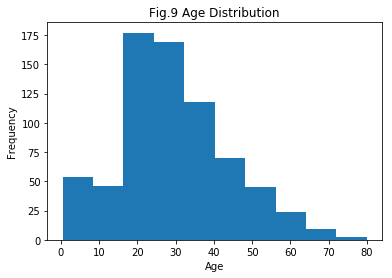

In [192]:
# 乘员年龄分布
show_column_distribution(valid_age_df, 'Age', 'Age', plottype='hist')

In [193]:
# 按年龄每10岁为一组，分为 8 组：
valid_age_df['Agegroup'] = valid_age_df['Age'].apply(lambda x: int((x - 0.001)//10))

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
valid_age_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Agegroup  
0      0         A/5 21171   7.2500   NaN        S         2  
1      0          PC 17599  71.2833   C85        C         3  
2      0  STON/O2. 3101282   7.9250   NaN        S         2  
3      0            113803  53.1000  C123        S         3  
4      0            373450   8.0500   NaN        S         3

In [195]:
valid_age_df.groupby('Agegroup')['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Agegroup                                                    
0          64.0  0.593750  0.495015  0.0  0.0  1.0  1.0  1.0
1         115.0  0.382609  0.488151  0.0  0.0  0.0  1.0  1.0
2         230.0  0.365217  0.482541  0.0  0.0  0.0  1.0  1.0
3         155.0  0.445161  0.498595  0.0  0.0  0.0  1.0  1.0
4          86.0  0.383721  0.489143  0.0  0.0  0.0  1.0  1.0
5          42.0  0.404762  0.496796  0.0  0.0  0.0  1.0  1.0
6          17.0  0.235294  0.437237  0.0  0.0  0.0  0.0  1.0
7           5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0

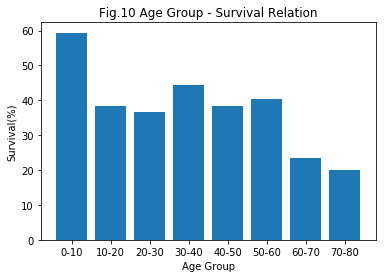

In [196]:
show_column_relation(valid_age_df, 'Agegroup', 'Age Group', 
                     tick_label=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

In [197]:
# 验证10岁以下和60岁以上乘员的生存率与总体生存率是否相同
# 年龄是连续变量，应用t检验
from scipy.stats import ttest_1samp

print '各样本与总体均数比较' 
print 'H0: 样本n的生存率与总体生存率相同'
print 'H1: 样本n的生存率与总体生存率不同'
print 'α=0.05，单尾t检验'
print '='*30

age_mean = valid_age_df['Survived'].mean()

for i in sorted(valid_age_df['Agegroup'].unique()):
    group_data = valid_age_df[valid_age_df['Agegroup']==i]['Survived'] 
    print '%d ~ %d岁：' % (i*10, (i+1)*10), ttest_1samp(group_data, age_mean)



各样本与总体均数比较
H0: 样本n的生存率与总体生存率相同
H1: 样本n的生存率与总体生存率不同
α=0.05，单尾t检验
0 ~ 10岁： Ttest_1sampResult(statistic=3.0316269074489375, pvalue=0.0035278697359956961)
10 ~ 20岁： Ttest_1sampResult(statistic=-0.51743424867834753, pvalue=0.60585563429174139)
20 ~ 30岁： Ttest_1sampResult(statistic=-1.2868595896229751, pvalue=0.19944252093645054)
30 ~ 40岁： Ttest_1sampResult(statistic=0.97380009743201446, pvalue=0.33168291549268702)
40 ~ 50岁： Ttest_1sampResult(statistic=-0.42546668930831599, pvalue=0.67157178922433469)
50 ~ 60岁： Ttest_1sampResult(statistic=-0.018270420460130162, pvalue=0.98551174843507838)
60 ~ 70岁： Ttest_1sampResult(statistic=-1.6112719985589989, pvalue=0.12666898151774331)
70 ~ 80岁： Ttest_1sampResult(statistic=-1.0308123249299719, pvalue=0.36087539994202772)


**结论4.2.5**
- 从图10大致推测10岁以下、60~70岁和70~80岁3个年龄段生存率与其他年龄段生存率差异较明显。10岁以下儿童的生存率较高。
- 从t检验结果可得出结论：10岁以下乘员的生存率高于总体生存率，其他年龄段生存率与总体生存率相同